In [1]:
#Імпорт необхідних бібліотек
import math as m
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as ppl
import tensorflow as tf

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler as ss
from sklearn.preprocessing import LabelEncoder as le
from tensorflow import keras as ks
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential as sql
from tensorflow.keras.layers import Dense as dn
from tensorflow.keras.callbacks import LearningRateScheduler as lrs

In [2]:
#Бінарна класифікація
nmp.random.seed(13)
feat1 = nmp.round(nmp.random.uniform(low=(1, 100)[0], high=(1, 100)[1], size=130))
feat2 = nmp.round(nmp.random.uniform(low=(1, 100)[0], high=(1, 100)[1], size=130))
labels = nmp.where((feat1 >= (60, 100)[0]) & (feat1 <= (60, 100)[1]) & (feat2 >= (60, 100)[0]) & (feat2 <= (60, 100)[1]), 1, 0)
dat = pnd.DataFrame({'Practices': feat1, 'Labs': feat2, 'Target': labels})
dat.to_csv('Binary.csv', index=False)
x = dat.drop('Target', axis=1)
y = dat['Target']
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.2, random_state=13)
scal = ss()
xtrains = scal.fit_transform(xtrain)
xtests = scal.transform(xtest)
md = sql([dn(10, activation='relu', input_shape=(x.shape[1],)), dn(10, activation='relu'), dn(1, activation='sigmoid')])
md.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = md.fit(xtrains, ytrain, epochs=50, validation_data=(xtests, ytest))
testl, testac = md.evaluate(xtests, ytest)
print("Model loss: ", testl)
print("Model accuracy: ", testac)

Epoch 1/50
4/4 [==============================] - 2s 199ms/step - loss: 0.6936 - accuracy: 0.5288 - val_loss: 0.6763 - val_accuracy: 0.6538
Epoch 2/50
4/4 [==============================] - 0s 20ms/step - loss: 0.6837 - accuracy: 0.5865 - val_loss: 0.6673 - val_accuracy: 0.6923
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 0.6740 - accuracy: 0.6058 - val_loss: 0.6583 - val_accuracy: 0.7692
Epoch 4/50
4/4 [==============================] - 0s 21ms/step - loss: 0.6642 - accuracy: 0.6346 - val_loss: 0.6493 - val_accuracy: 0.7692
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 0.6541 - accuracy: 0.7115 - val_loss: 0.6403 - val_accuracy: 0.8462
Epoch 6/50
4/4 [==============================] - 0s 20ms/step - loss: 0.6444 - accuracy: 0.7885 - val_loss: 0.6309 - val_accuracy: 0.9615
Epoch 7/50
4/4 [==============================] - 0s 19ms/step - loss: 0.6340 - accuracy: 0.8846 - val_loss: 0.6214 - val_accuracy: 1.0000
Epoch 8/50
4/4 [==========

In [3]:
#Покращення результатів
dat1 = pnd.read_csv('Binary.csv')
x1 = dat1.drop('Target', axis=1)
y1 = dat1['Target']
xtrain1, xtest1, ytrain1, ytest1 = tts(x1, y1, test_size=0.2, random_state=13)
xtrain1s = scal.fit_transform(xtrain1)
xtest1s = scal.transform(xtest1)
imd = sql([dn(64, activation='relu', input_shape=(x1.shape[1],)), dn(32, activation='relu'), dn(16, activation='relu'), dn(1, activation='sigmoid')])
imd.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
def lrsc(epoch):
    lr = 0.001 * m.pow(0.9, m.floor((1 + epoch) / 10))
    return lr
lrimd = lrs(lrsc)
ihist = imd.fit(xtrain1s, ytrain1, epochs=300, validation_data=(xtest1s, ytest1), callbacks=[lrimd])
test1l, test1ac = imd.evaluate(xtest1s, ytest1)
print("Model loss: ", test1l)
print("Model accuracy: ", test1ac)

Epoch 1/300
4/4 [==============================] - 2s 133ms/step - loss: 0.6707 - accuracy: 0.8173 - val_loss: 0.6413 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 2/300
4/4 [==============================] - 0s 19ms/step - loss: 0.6276 - accuracy: 0.8558 - val_loss: 0.5997 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 3/300
4/4 [==============================] - 0s 18ms/step - loss: 0.5836 - accuracy: 0.8558 - val_loss: 0.5601 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 4/300
4/4 [==============================] - 0s 23ms/step - loss: 0.5413 - accuracy: 0.8558 - val_loss: 0.5217 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 5/300
4/4 [==============================] - 0s 18ms/step - loss: 0.4976 - accuracy: 0.8558 - val_loss: 0.4860 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 6/300
4/4 [==============================] - 0s 17ms/step - loss: 0.4592 - accuracy: 0.8558 - val_loss: 0.4505 - val_accuracy: 0.8077 - lr: 0.0010
Epoch 7/300
4/4 [==============================] - 0s 19ms/step - loss: 0.4204 - 


              Model  Accuracy
0           Binary  0.990385
1  Improved binary  1.000000


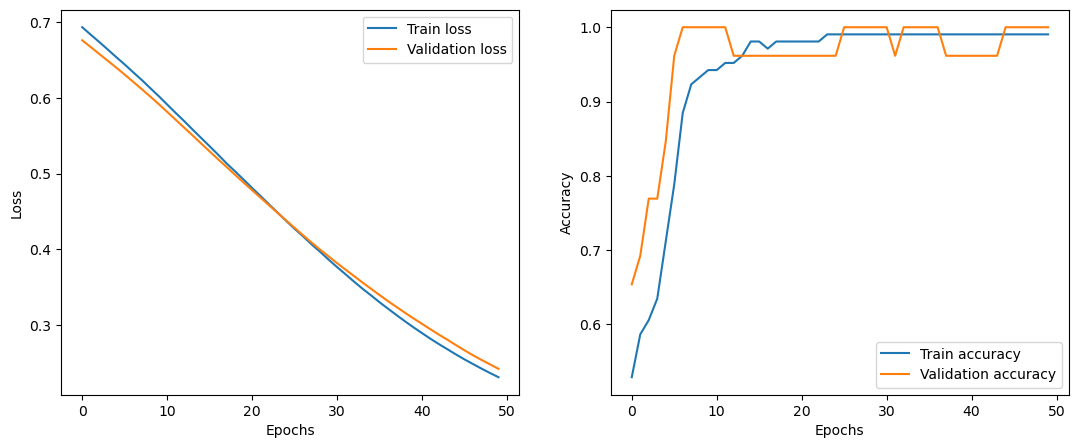

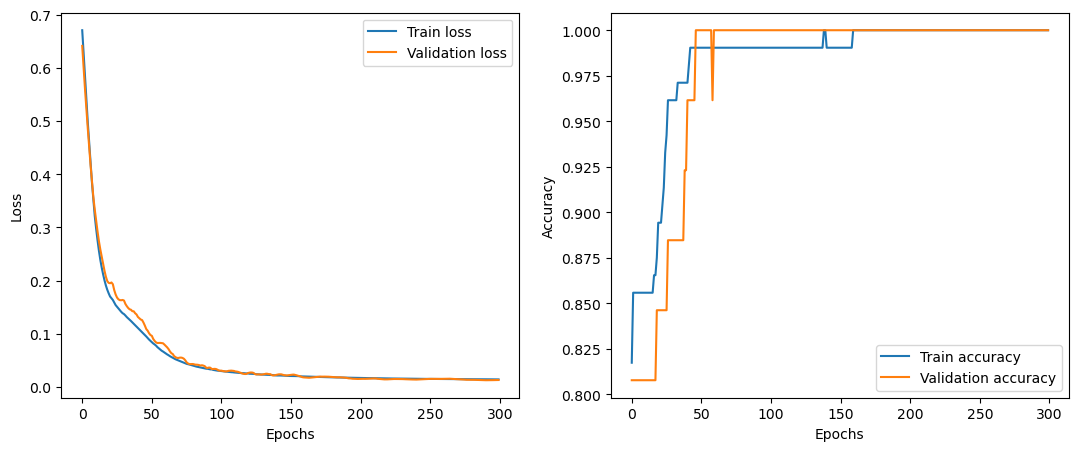

In [4]:
#Вивід оцінки моделей і візуалізація
mdac = hist.history['accuracy'][-1]
imdac = ihist.history['accuracy'][-1]
res = [['Binary', mdac], ['Improved binary', imdac]]
resframe = pnd.DataFrame(res, columns=['Model', 'Accuracy'])
print('\n', resframe)
tloss = hist.history['loss']
vloss = hist.history['val_loss']
taccur = hist.history['accuracy']
vaccur = hist.history['val_accuracy']
itloss = ihist.history['loss']
ivloss = ihist.history['val_loss']
itaccur = ihist.history['accuracy']
ivaccur = ihist.history['val_accuracy']
ppl.figure(figsize=(13, 5))
ppl.subplot(1, 2, 1)
ppl.plot(tloss, label='Train loss')
ppl.plot(vloss, label='Validation loss')
ppl.xlabel('Epochs')
ppl.ylabel('Loss')
ppl.legend()
ppl.subplot(1, 2, 2)
ppl.plot(taccur, label='Train accuracy')
ppl.plot(vaccur, label='Validation accuracy')
ppl.xlabel('Epochs')
ppl.ylabel('Accuracy')
ppl.legend()
ppl.figure(figsize=(13, 5))
ppl.subplot(1, 2, 1)
ppl.plot(itloss, label='Train loss')
ppl.plot(ivloss, label='Validation loss')
ppl.xlabel('Epochs')
ppl.ylabel('Loss')
ppl.legend()
ppl.subplot(1, 2, 2)
ppl.plot(itaccur, label='Train accuracy')
ppl.plot(ivaccur, label='Validation accuracy')
ppl.xlabel('Epochs')
ppl.ylabel('Accuracy')
ppl.legend()
ppl.show(close=None, block=None)

In [5]:
#Мультикласова класифікація
nmp.random.seed(13)
feat1 = nmp.round(nmp.random.uniform(low=(1, 100)[0], high=(1, 100)[1], size=300), 1)
feat2 = nmp.round(nmp.random.uniform(low=(1, 100)[0], high=(1, 100)[1], size=300), 1)
labels = nmp.select([(feat1 < 36) | (feat2 < 36), (feat1 >= 36) & (feat1 < 60) & (feat2 >= 36) & (feat2 < 60), (feat1 >= 60) & (feat2 >= 60)], ['Low', 'Medium', 'High'], default='Low')
data = pnd.DataFrame({'Practices': feat1, 'Labs': feat2, 'Target': labels})
data.to_csv('Multiclass.csv', index=False)
x2 = data.drop('Target', axis=1)
y2 = data['Target']
lenc = le()
yecn = lenc.fit_transform(y2)
xtrain2, xtest2, ytrain2, ytest2 = tts(x2, yecn, test_size=0.2, random_state=13)
xtrain2s = scal.fit_transform(xtrain2)
xtest2s = scal.fit_transform(xtest2)
mdl = sql([dn(10, activation='relu', input_shape=(x.shape[1],)), dn(10, activation='relu'), dn(3, activation='softmax')])
mdl.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist2 = mdl.fit(xtrain2s, ytrain2, epochs=50, validation_data=(xtest2s, ytest2))
test2l, test2ac = mdl.evaluate(xtest2s, ytest2)
print("Model loss: ", test2l)
print("Model accuracy: ", test2ac)   

Epoch 1/50
8/8 [==============================] - 1s 55ms/step - loss: 1.0664 - accuracy: 0.3583 - val_loss: 1.0308 - val_accuracy: 0.5333
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 1.0246 - accuracy: 0.4458 - val_loss: 0.9902 - val_accuracy: 0.6167
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.9839 - accuracy: 0.5833 - val_loss: 0.9507 - val_accuracy: 0.7167
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.9440 - accuracy: 0.7500 - val_loss: 0.9118 - val_accuracy: 0.8167
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.9047 - accuracy: 0.8208 - val_loss: 0.8731 - val_accuracy: 0.8167
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.8639 - accuracy: 0.8208 - val_loss: 0.8343 - val_accuracy: 0.8167
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.8226 - accuracy: 0.8208 - val_loss: 0.7941 - val_accuracy: 0.8167
Epoch 8/50
8/8 [=============

In [6]:
#Покращення результатів
data1 = pnd.read_csv('Multiclass.csv')
x3 = data1.drop('Target', axis=1)
y3 = data1['Target']
yecn3 = lenc.fit_transform(y3)
xtrain3, xtest3, ytrain3, ytest3 = tts(x3, yecn3, test_size=0.2, random_state=13)
xtrain3s = scal.fit_transform(xtrain3)
xtest3s = scal.fit_transform(xtest3)
imdl = sql([dn(64, activation='relu', input_shape=(2,)), dn(32, activation='relu'), dn(16, activation='relu'), dn(3, activation='softmax')])
imdl.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
def lrsc(epoch):
    lr = 0.001 * m.pow(0.9, m.floor((1 + epoch) / 10))
    return lr
lrimdl = lrs(lrsc)
ihist3 = imdl.fit(xtrain3s, ytrain3, epochs=300, validation_data=(xtest3s, ytest3), callbacks=[lrimdl])
test3l, test3ac = imdl.evaluate(xtest3s, ytest3)
print("Model loss: ", test3l)
print("Model accuracy: ", test3ac)

Epoch 1/300
8/8 [==============================] - 1s 66ms/step - loss: 1.2078 - accuracy: 0.1292 - val_loss: 1.0777 - val_accuracy: 0.4833 - lr: 0.0010
Epoch 2/300
8/8 [==============================] - 0s 10ms/step - loss: 1.0270 - accuracy: 0.7333 - val_loss: 0.9450 - val_accuracy: 0.8833 - lr: 0.0010
Epoch 3/300
8/8 [==============================] - 0s 9ms/step - loss: 0.8958 - accuracy: 0.9167 - val_loss: 0.8282 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 4/300
8/8 [==============================] - 0s 10ms/step - loss: 0.7745 - accuracy: 0.9167 - val_loss: 0.7114 - val_accuracy: 0.9333 - lr: 0.0010
Epoch 5/300
8/8 [==============================] - 0s 10ms/step - loss: 0.6530 - accuracy: 0.8958 - val_loss: 0.5913 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 6/300
8/8 [==============================] - 0s 9ms/step - loss: 0.5328 - accuracy: 0.8875 - val_loss: 0.4834 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 7/300
8/8 [==============================] - 0s 9ms/step - loss: 0.4301 - accu


              Model  Accuracy
0           Binary  0.990385
1  Improved binary  1.000000


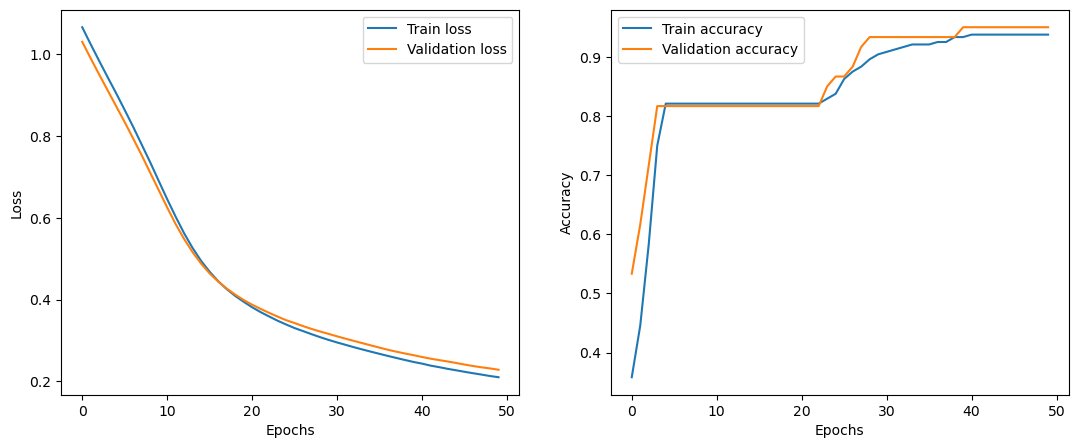

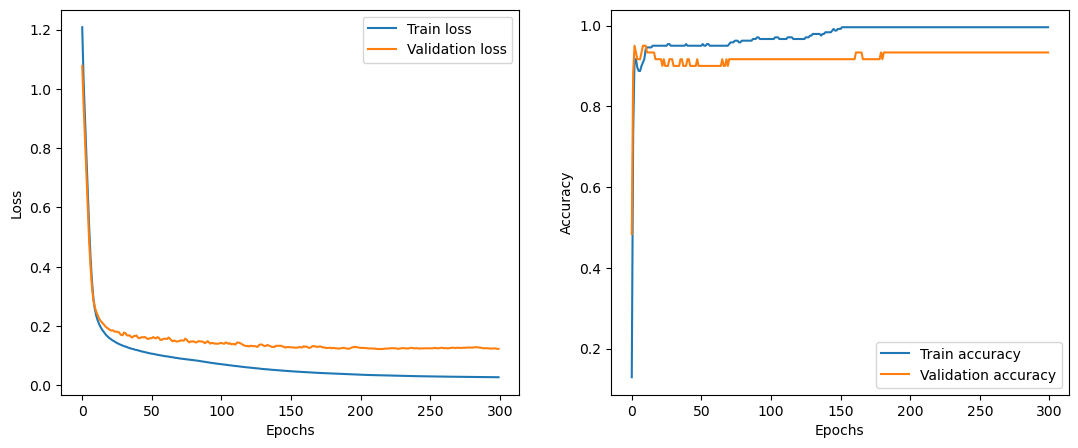

In [8]:
#Вивід оцінки моделей і візуалізація
mdlac = hist2.history['accuracy'][-1]
imdlac = ihist3.history['accuracy'][-1]
res1 = [['Multiclass', mdlac], ['Improved multiclass', imdlac]]
res1frame = pnd.DataFrame(res1, columns=['Model', 'Accuracy'])
print('\n', resframe)
tloss2 = hist2.history['loss']
vloss2 = hist2.history['val_loss']
taccur2 = hist2.history['accuracy']
vaccur2 = hist2.history['val_accuracy']
itloss3 = ihist3.history['loss']
ivloss3 = ihist3.history['val_loss']
itaccur3 = ihist3.history['accuracy']
ivaccur3 = ihist3.history['val_accuracy']
ppl.figure(figsize=(13, 5))
ppl.subplot(1, 2, 1)
ppl.plot(tloss2, label='Train loss')
ppl.plot(vloss2, label='Validation loss')
ppl.xlabel('Epochs')
ppl.ylabel('Loss')
ppl.legend()
ppl.subplot(1, 2, 2)
ppl.plot(taccur2, label='Train accuracy')
ppl.plot(vaccur2, label='Validation accuracy')
ppl.xlabel('Epochs')
ppl.ylabel('Accuracy')
ppl.legend()
ppl.figure(figsize=(13, 5))
ppl.subplot(1, 2, 1)
ppl.plot(itloss3, label='Train loss')
ppl.plot(ivloss3, label='Validation loss')
ppl.xlabel('Epochs')
ppl.ylabel('Loss')
ppl.legend()
ppl.subplot(1, 2, 2)
ppl.plot(itaccur3, label='Train accuracy')
ppl.plot(ivaccur3, label='Validation accuracy')
ppl.xlabel('Epochs')
ppl.ylabel('Accuracy')
ppl.legend()
ppl.show(close=None, block=None)